In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 1a
**Which are the three major sub systems of a digital camera? Explain any two important functions performed by the DSP sub system ?**

Three major subsystems:
- Optics
- Analog to Digital Converter
- Digital Signal Processing\
Few functions of DSP : Sharpening, Denoising

### 1b

**A manufacturing company purchased an imaging system whose function is to either smooth or sharpen images. The results of using the system on the manufacturing floor have been poor, and the plant manager suspects that the system is not smoothing and sharpening images the way it should. You are hired as a consultant to determine if the system is performing these functions properly. How would you determine if the system is working correctly?**

The sum of values in a smoothing filter sums upto 1 (like, BOX filter). The sum of pixel values in the original image and the filtered image is equal while using a smoothing filter.\
The sum of values in a sharpening filter sums upto 0 (like, Sobel filter). The sum of pixel values in the filtered image is 0.

### 2a
**Find the correlation and convolution between the sequences x(n) and h(n).**

In [40]:
x =  np.array([1,2,3,5])
h = np.array([0.5,0.5])

In [41]:
def slide(x,h):
    x = np.pad(x,[(1,)],mode='constant')
    y = np.zeros((len(x)-1))
    
    for i in range(len(x)-1):
        y[i] = (x[i]*h[0] + x[i+1]*h[1])
        
    return y

In [42]:
conv = slide(x,np.flip(h))
corr = slide(x, h)

print(f"Convolution : {conv}\nCorrelation : {corr}")

Convolution : [0.5 1.5 2.5 4.  2.5]
Correlation : [0.5 1.5 2.5 4.  2.5]


In [43]:
y = np.sum(conv)
print("y(n) : ",y)

y(n) :  11.0


### 2b

**For the above problem, let y(n) = x(n) * h(n). Find sum(y(n)) .  Also find sum(y(n))  h(n) = {0.5, -0.5}.**

In [44]:
h = [0.5,-0.5]

conv = slide(x,np.flip(h))
corr = slide(x, h)

print(f"Convolution : {conv}\nCorrelation : {corr}")


Convolution : [ 0.5  0.5  0.5  1.  -2.5]
Correlation : [-0.5 -0.5 -0.5 -1.   2.5]


In [45]:
y = np.sum(conv)
print("y(n) : ",y)

y(n) :  0.0


*Inference :* When the sum of values in filter is 0, the sum of pixel values in the image also evaluates to 0.

### 3a

**An image is filtered with a kernel whose coefficients sum to 1. What is the relation between sum of the pixel values in the original and filtered images. Prove the result mathematically.**

In [46]:
#BOX FILTER
filter = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

#random 3x3 image
image = np.array([[1,2,3],[4,5,6,],[7,8,9]])

#convolution
def convolution(image, filter):
    
    result = np.zeros((image.shape[0]+2, image.shape[1]+2))
    
    # zero padding
    image = np.pad(image,[(2,), (2,)],mode = 'constant')
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.sum(image[i:i+3, j:j+3]*filter)
            
    return result

In [47]:
filtered_image = convolution(image, filter)

print("\nOriginal Image : \n", image)
print("\nFiltered (Smoothened) Image : \n", filtered_image)

def sum_of_pixels(image):
    return np.sum(image)

print("\nSum of pixels in filter : ", np.sum(filter))
print("\nBox Filter : \n",filter)
print("Sum of pixels in original image : ", sum_of_pixels(image))
print("Sum of pixels in filtered (Smoothened) image : ", sum_of_pixels(filtered_image))


Original Image : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Filtered (Smoothened) Image : 
 [[0.11111111 0.33333333 0.66666667 0.55555556 0.33333333]
 [0.55555556 1.33333333 2.33333333 1.77777778 1.        ]
 [1.33333333 3.         5.         3.66666667 2.        ]
 [1.22222222 2.66666667 4.33333333 3.11111111 1.66666667]
 [0.77777778 1.66666667 2.66666667 1.88888889 1.        ]]

Sum of pixels in filter :  1.0

Box Filter : 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Sum of pixels in original image :  45
Sum of pixels in filtered (Smoothened) image :  45.0



$$
y(n) = x(n) * h(n)\\


y(n) = \sum_{k=0}^{inf} x(k) * h(n-k)\\


\sum_{n=0}^{inf} y(n) = \sum_{n=0}^{inf} \sum_{k=0}^{inf} x(k) * h(n-k)\\


\sum_{n=0}^{inf} y(n) = \sum_{n=0}^{inf} x(k) \sum_{k=0}^{inf} h(n-k)\\


\sum_{k=0}^{inf} h(n-k) = 1 \\

\sum_{n=0}^{inf} y(n) = \sum_{n=0}^{inf} x(k)

$$
         sum of pixel values in filtered image = sum of pixel values in original image

### 3b

**An image is filtered with a kernel whose coefficients sum to 0. What is the sum of the pixel values in the filtered image? Prove the result mathematically.**

In [48]:
#SOBEL FILTER
filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

#random 3x3 image
image = np.array([[1,2,3],[4,5,6,],[7,8,9]])

In [49]:
filtered_image = convolution(image, filter)

print("\nOriginal Image : \n", image)
print("\nFiltered (Sharpened) Image : \n", filtered_image)

def sum_of_pixels(image):
    return np.sum(image)

print("\nSum of pixels in filter : ", np.sum(filter))
print("\nSobel Filter : \n",filter)
print("Sum of pixels in original image : ", sum_of_pixels(image))
print("Sum of pixels in filtered (Sharpened) image : ", sum_of_pixels(filtered_image))


Original Image : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Filtered (Sharpened) Image : 
 [[ 0. -1. -2. -3.  0.]
 [-1. -2. -1.  4. -3.]
 [-4.  3.  0.  7. -6.]
 [-7. 16. 11. 22. -9.]
 [ 0. -7. -8. -9.  0.]]

Sum of pixels in filter :  0

Sobel Filter : 
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Sum of pixels in original image :  45
Sum of pixels in filtered (Sharpened) image :  0.0



$$
y(n) = x(n) * h(n)\\


y(n) = \sum_{k=0}^{inf} x(k) * h(n-k)\\


\sum_{n=0}^{inf} y(n) = \sum_{n=0}^{inf} \sum_{k=0}^{inf} x(k) * h(n-k)\\


\sum_{n=0}^{inf} y(n) = \sum_{n=0}^{inf} x(k) \sum_{k=0}^{inf} h(n-k)\\


\sum_{k=0}^{inf} h(n-k) = 0 \\

\sum_{n=0}^{inf} y(n) = 0

$$
         sum of pixel values in filtered image = 0

### 4a

**Suppose the normalized grey values in an image are uniform in the interval [0,10]. (Let the grey values to be continuous.). It is required to transform these grey values to a new set of values so that the histogram of the transformed values should be exponential in nature. Derive an appropriate expression for the required transformation.**


$$
F_{x}(x) ~ [0,10]\\

F_{x}(x) = F_{y}(y)\\
    \textrm{(always   uniform    distribution)}\\

F_{x}(x) = \int\limits_{-\infty}^x f_{x}(u) du = \frac{x}{10}\\

F_{y}(y) = \int\limits_{-\infty}^x f_{y}(u) du\\
$$

$$
F_{y}(y) = \int_{-\infty}^{y} \lambda e^{-\lambda u} du
$$

$$
F_{y}(y) = \int_{0}^{y} \lambda e^{-\lambda u} du
$$

$$
F_{y}(y) = \frac{e^{-\lambda u}}{-\lambda}
$$

$$
F_{y}(y) = F_{x}(x) = \frac{x}{10} =  - [e^{-\lambda y} - 1]
$$

$$
\frac{x}{10} = 1 - e^{-\lambda y}
$$

$$
x = 10 - 10e^{-\lambda y}
$$

$$
\frac{10 - x}{10} = e^{-\lambda y}
$$

$$
\log( \frac{10 - x}{10}) = -\lambda y
$$

$$
y = \frac{-1}{\lambda} \log( \frac{10 - x}{10})
$$

### 4b

**If a 3x3 box filter is applied on the image shown in Question 5(a), what is the filtered output corresponding to the center pixel in the input image.**


In [50]:
image = np.array([[2,5,4,3,7],[0,7,2,1,1],[3,0,0,1,1],[2,3,2,4,6],[1,2,2,4,0]])
print("Image \n",image)

#BOX FILTER
filter = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

n = 5//2

centre_pixel = np.sum(image[n-1:n+2, n-1:n+2]*filter)

print(f"\nCentre Pixel : {centre_pixel}\nRounded off value : {np.round(centre_pixel)}")

Image 
 [[2 5 4 3 7]
 [0 7 2 1 1]
 [3 0 0 1 1]
 [2 3 2 4 6]
 [1 2 2 4 0]]

Centre Pixel : 2.2222222222222223
Rounded off value : 2.0


### 5a

**Consider the following 3-bit 5x5 image and plot the histogram of its negative.**

In [51]:
image = np.array([[2,5,4,3,7],[0,7,2,1,1],[3,0,0,1,1],[2,3,2,4,6],[1,2,2,4,0]])
print(image)

[[2 5 4 3 7]
 [0 7 2 1 1]
 [3 0 0 1 1]
 [2 3 2 4 6]
 [1 2 2 4 0]]


In [52]:
negative_image = 7 - image
print(negative_image)

[[5 2 3 4 0]
 [7 0 5 6 6]
 [4 7 7 6 6]
 [5 4 5 3 1]
 [6 5 5 3 7]]


In [53]:
def get_histogram(image,title):
    histogram = np.zeros(8)
    for i in range(5):
        for j in range(5):
            histogram[image[i,j]] += 1
    sns.barplot(x=np.arange(8), y=histogram)
    plt.title(title);
    return histogram

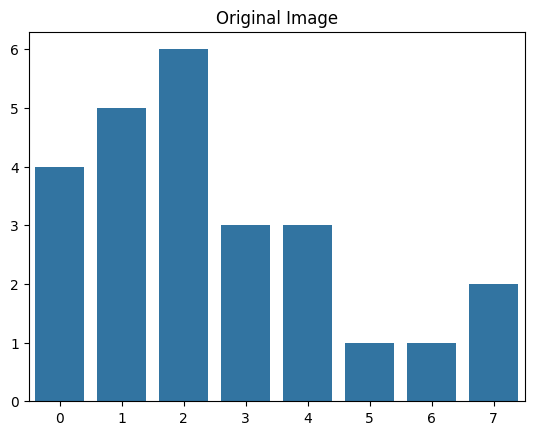

In [54]:
histogram = get_histogram(image, "Original Image")

array([2., 1., 1., 3., 3., 6., 5., 4.])

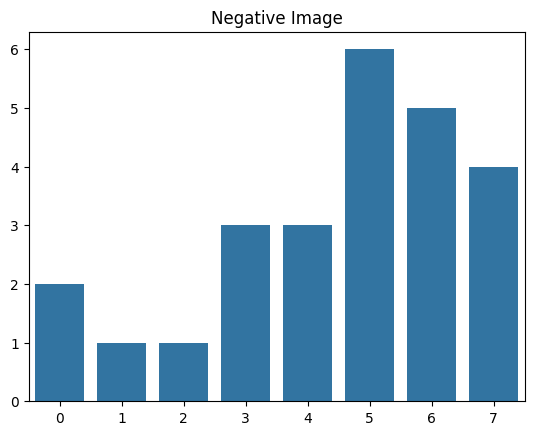

In [55]:
get_histogram(negative_image, "Negative Image")

### 5b

**Perform histogram equalization on the above image and obtain the equalized image.**

In [56]:
data = pd.DataFrame()
data['pixel'] = [i for i in range(8)]
data['frequency'] = [histogram[i] for i in range(8)]
data['pdf'] = [histogram[i]/25 for i in range(8)]
data['cdf'] = [sum(data['pdf'][:i+1]) for i in range(8)]
data['cdfx7'] = [7*data['cdf'][i] for i in range(8)]
data['new_pixel'] = [int(np.round(7*data['cdf'][i])) for i in range(8)] 
data

,pixel,frequency,pdf,cdf,cdfx7,new_pixel
0,0,4.0,0.16,0.16,1.12,1
1,1,5.0,0.20,0.36,2.52,3
2,2,6.0,0.24,0.60,4.20,4
3,3,3.0,0.12,0.72,5.04,5
4,4,3.0,0.12,0.84,5.88,6
5,5,1.0,0.04,0.88,6.16,6
6,6,1.0,0.04,0.92,6.44,6
7,7,2.0,0.08,1.00,7.00,7


In [57]:
new_histogram = [0 for i in range(8)]
for i in range(8):
    new_histogram[data['new_pixel'][i]] += data['frequency'][i]
    
new_histogram

[0, 4.0, 0, 5.0, 6.0, 3.0, 5.0, 2.0]

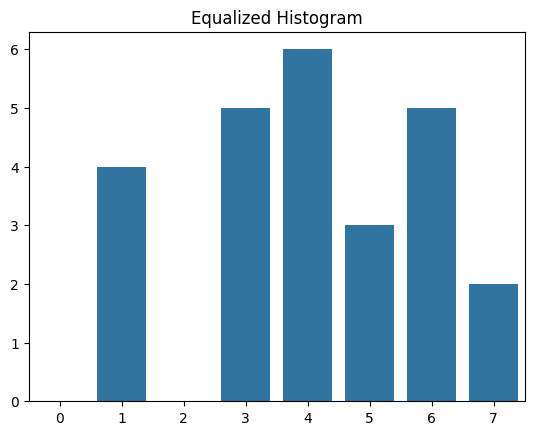

In [58]:
sns.barplot(x=np.arange(8), y= new_histogram)
plt.title("Equalized Histogram");

In [59]:
equalized_image = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        equalized_image[i,j] = int(data['new_pixel'][image[i,j]])
print("EQUALIZED IMAGE : ")
print(equalized_image)

EQUALIZED IMAGE : 
[[4. 6. 6. 5. 7.]
 [1. 7. 4. 3. 3.]
 [5. 1. 1. 3. 3.]
 [4. 5. 4. 6. 6.]
 [3. 4. 4. 6. 1.]]


-------